In [1]:
import openmc

openmc.run(openmc_exec="/Users/lindad/projects/Okapi/openmc/build/bin/openmc")


                               %%%%%%%%%%%%%%%
                          %%%%%%%%%%%%%%%%%%%%%%%%
                       %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                   %%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                ###############      %%%%%%%%%%%%%%%%%%%%%%%%
               ##################     %%%%%%%%%%%%%%%%%%%%%%%
               ###################     %%%%%%%%%%%%%%%%%%%%%%%
               ####################     %%%%%%%%%%%%%%%%%%%%%%
               #####################     %%%%%%%%%%%%%%%%%%%%%
               ######################     %%%%%%%%%%%%%%%%%%%%
               #######################     %%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%

In [11]:
with openmc.StatePoint('statepoint.80.h5') as sp:
    tallies = sp.tallies

fissiont = tallies[1]

from series.Zernike import Zernike

z5 = Zernike(5, 0, 0, .6)
fissiont.mean.shape = (21,)
z5.coefficients = fissiont.mean

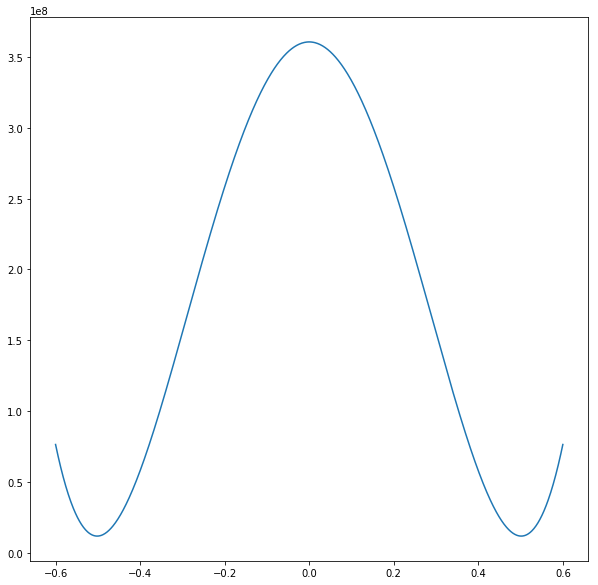

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

r = np.linspace(-.6, .6, 1000)
fission_eval = np.zeros((r.size))
for index, rval in enumerate(r):
    fission_eval[index] = z5(rval,0)
    
plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(r, fission_eval)

In [8]:
fission_eval.shape

(1000,)

In [9]:
%debug

> /Users/lindad/projects/Okapi/moose/modules/functional_expansion_tools/python/series/Zernike.py(88)innerProduct()
     86 
     87     def innerProduct(self):
---> 88         return np.inner(self.coefficients, self.basis_functions)
     89 
     90     def computeTen(self):

ipdb> p self.coefficients
array([[[ 9.94683963e+07]],

       [[ 6.33452153e+04]],

       [[-6.29466588e+04]],

       [[-2.65347961e+03]],

       [[-1.42100854e+08]],

       [[-3.29687541e+03]],

       [[ 4.23782649e+03]],

       [[-1.43762127e+05]],

       [[ 1.49398670e+05]],

       [[-1.09297733e+03]],

       [[ 3.83951395e+03]],

       [[ 1.31704134e+04]],

       [[ 1.19109463e+08]],

       [[ 1.13020817e+04]],

       [[-7.44447634e+02]],

       [[ 3.35576616e+02]],

       [[-1.73229098e+04]],

       [[ 1.74275827e+05]],

       [[-2.00750416e+05]],

       [[ 3.81463007e+03]],

       [[ 1.60238805e+03]]])
ipdb> p self.coefficients.shape
(21, 1, 1)
ipdb> p self.basis_functions.shape
(21,)
ipdb

In [10]:
fissiont.mean.shape

(21, 1, 1)